In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
digits.images.shape

(1797, 8, 8)

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target.shape

(1797,)

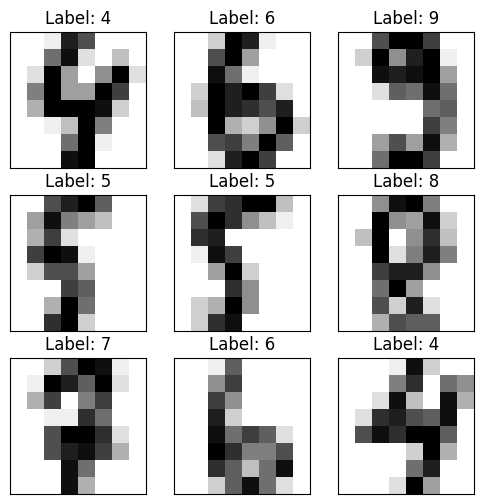

In [5]:
# Selecting 9 random indices
random_indices = np.random.choice(len(digits.images), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {digits.target[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

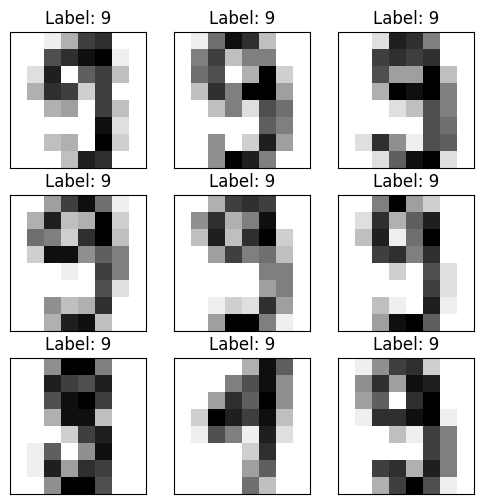

In [6]:
# Selecting 9 random indices of images labelled as 9
random_indices = np.random.choice(np.where(digits.target == 9)[0], 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {digits.target[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    digits.data, 
    digits.target,
    test_size=0.2, # 20% of the data is used for testing
    random_state=42 # Providing a value here means getting the same "random" split every time
)

In [9]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1437, 64)
y_train shape: (1437,)
X_test shape: (360, 64)
y_test shape: (360,)


In [10]:
from tensorflow.keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train[0]}')

Before one-hot encoding: 6
After one-hot encoding: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Input layer
model.add(Dense(64, activation='relu', input_shape=(64,))) # 64 neurons, ReLU activation, input shape of 64

# Hidden layer
model.add(Dense(64, activation='relu')) # 64 neurons, ReLU activation

# Output layer
model.add(Dense(10, activation='softmax')) # 10 neurons, softmax activation

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 8,970
Trainable params: 8,970
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='sgd', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

In [14]:
model.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=5, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)

Epoch 1/5
36/36 [==============================] - 1s 11ms/step - loss: 1.5281 - accuracy: 0.5936 - val_loss: 0.5921 - val_accuracy: 0.8403
Epoch 2/5
36/36 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.8677 - val_loss: 0.4069 - val_accuracy: 0.8750
Epoch 3/5
36/36 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.9260 - val_loss: 0.3125 - val_accuracy: 0.8854
Epoch 4/5
36/36 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9434 - val_loss: 0.3110 - val_accuracy: 0.9167
Epoch 5/5
36/36 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9530 - val_loss: 0.2573 - val_accuracy: 0.9236


In [15]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

12/12 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 0.9306
Loss:     0.21
Accuracy: 93.06%


12/12 [==============================] - 0s 1ms/step


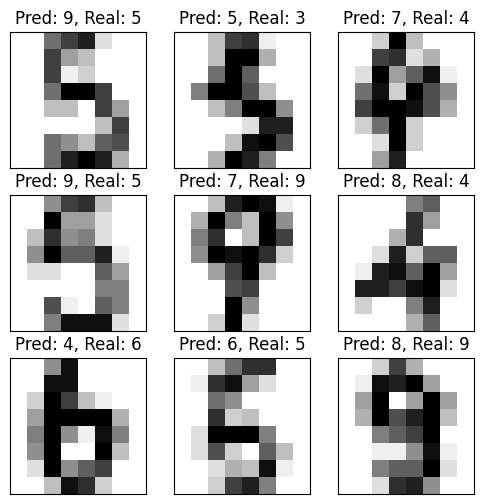

In [16]:
# Get the predictions for the test data
predictions = model.predict(X_test)

# Get the index of the largest probability (i.e. the predicted class)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Get the misclassified samples themselves
misclassified_samples = X_test[misclassified_indices]
misclassified_labels = np.argmax(y_test[misclassified_indices], axis=1)

# Pick 9 random misclassified samples
random_indices = np.random.choice(len(misclassified_indices), 9, replace=False)

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(misclassified_samples[random_indices[i]].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Pred: {predicted_classes[misclassified_indices[random_indices[i]]]}, Real: {misclassified_labels[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

In [18]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

12/12 [==============================] - 0s 1ms/step - loss: 0.2061 - accuracy: 0.9306
Loss:     0.21
Accuracy: 93.06%


12/12 [==============================] - 0s 15ms/step


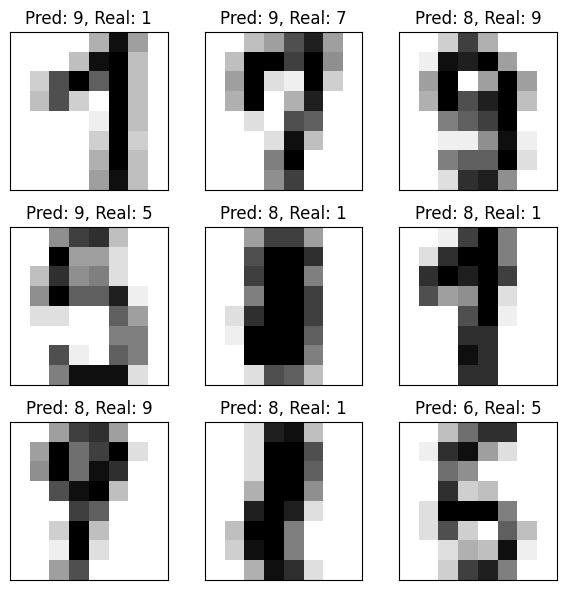

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test data
predictions = model.predict(X_test)

# Get the index of the largest probability (i.e., predicted class)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = np.argmax(y_test, axis=1)

# Indices of misclassified examples
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Get the misclassified samples and their true labels
misclassified_samples = X_test[misclassified_indices]
misclassified_labels = true_classes[misclassified_indices]

# Pick 9 random misclassified samples
random_indices = np.random.choice(len(misclassified_indices), 9, replace=False)

# Visualize the misclassified examples
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(misclassified_samples[random_indices[i]].reshape(8, 8), 
              cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Pred: {predicted_classes[misclassified_indices[random_indices[i]]]}, "
                 f"Real: {misclassified_labels[random_indices[i]]}")

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [20]:
from tensorflow.keras.optimizers import SGD

# Compile the model with the default SGD optimizer
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)

In [21]:
# Compile the model with a decreased learning rate (by a factor of 10)
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),  # Default is 0.1, so we reduce by a factor of 10
    metrics=['accuracy']
)

# Train the model (you can use the same training code from earlier)
history_sgd_low_lr = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
36/36 [==============================] - 1s 10ms/step - loss: 0.1308 - accuracy: 0.9678 - val_loss: 0.2513 - val_accuracy: 0.9271
Epoch 2/5
36/36 [==============================] - 0s 3ms/step - loss: 0.1170 - accuracy: 0.9669 - val_loss: 0.2243 - val_accuracy: 0.9236
Epoch 3/5
36/36 [==============================] - 0s 3ms/step - loss: 0.0996 - accuracy: 0.9756 - val_loss: 0.2333 - val_accuracy: 0.9167
Epoch 4/5
36/36 [==============================] - 0s 3ms/step - loss: 0.0910 - accuracy: 0.9791 - val_loss: 0.1988 - val_accuracy: 0.9306
Epoch 5/5
36/36 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9748 - val_loss: 0.2139 - val_accuracy: 0.9236


In [23]:
# Compile the model with a decreased learning rate (by a factor of 100)
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.001),  # Reduce learning rate by a factor of 100
    metrics=['accuracy']
)

# Train the model
history_sgd_low_lr_100 = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
36/36 [==============================] - 1s 9ms/step - loss: 0.0595 - accuracy: 0.9904 - val_loss: 0.1884 - val_accuracy: 0.9410
Epoch 2/5
36/36 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9913 - val_loss: 0.1876 - val_accuracy: 0.9375
Epoch 3/5
36/36 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9904 - val_loss: 0.1871 - val_accuracy: 0.9375
Epoch 4/5
36/36 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9896 - val_loss: 0.1859 - val_accuracy: 0.9410
Epoch 5/5
36/36 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9904 - val_loss: 0.1853 - val_accuracy: 0.9444


In [24]:
# Compile the model with an increased learning rate
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=1.0),  # Increase the learning rate significantly
    metrics=['accuracy']
)

# Train the model
history_sgd_high_lr = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
36/36 [==============================] - 1s 9ms/step - loss: 472463.2500 - accuracy: 0.1140 - val_loss: 2.3139 - val_accuracy: 0.0833
Epoch 2/5
36/36 [==============================] - 0s 3ms/step - loss: 2.3152 - accuracy: 0.0923 - val_loss: 2.3081 - val_accuracy: 0.0833
Epoch 3/5
36/36 [==============================] - 0s 2ms/step - loss: 2.3120 - accuracy: 0.0957 - val_loss: 2.3071 - val_accuracy: 0.1007
Epoch 4/5
36/36 [==============================] - 0s 2ms/step - loss: 2.3122 - accuracy: 0.1053 - val_loss: 2.3022 - val_accuracy: 0.1215
Epoch 5/5
36/36 [==============================] - 0s 2ms/step - loss: 2.3091 - accuracy: 0.1036 - val_loss: 2.3147 - val_accuracy: 0.0868


In [25]:
# Compile the model with momentum enabled
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.1, momentum=0.9),  # Default learning rate, add momentum
    metrics=['accuracy']
)

# Train the model
history_sgd_momentum = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
36/36 [==============================] - 2s 10ms/step - loss: 2.3078 - accuracy: 0.1018 - val_loss: 2.3125 - val_accuracy: 0.0833
Epoch 2/5
36/36 [==============================] - 0s 3ms/step - loss: 2.3086 - accuracy: 0.0949 - val_loss: 2.3100 - val_accuracy: 0.0868
Epoch 3/5
36/36 [==============================] - 0s 2ms/step - loss: 2.3086 - accuracy: 0.0914 - val_loss: 2.3119 - val_accuracy: 0.0833
Epoch 4/5
36/36 [==============================] - 0s 2ms/step - loss: 2.3077 - accuracy: 0.0923 - val_loss: 2.3065 - val_accuracy: 0.0833
Epoch 5/5
36/36 [==============================] - 0s 2ms/step - loss: 2.3082 - accuracy: 0.0923 - val_loss: 2.3114 - val_accuracy: 0.0938


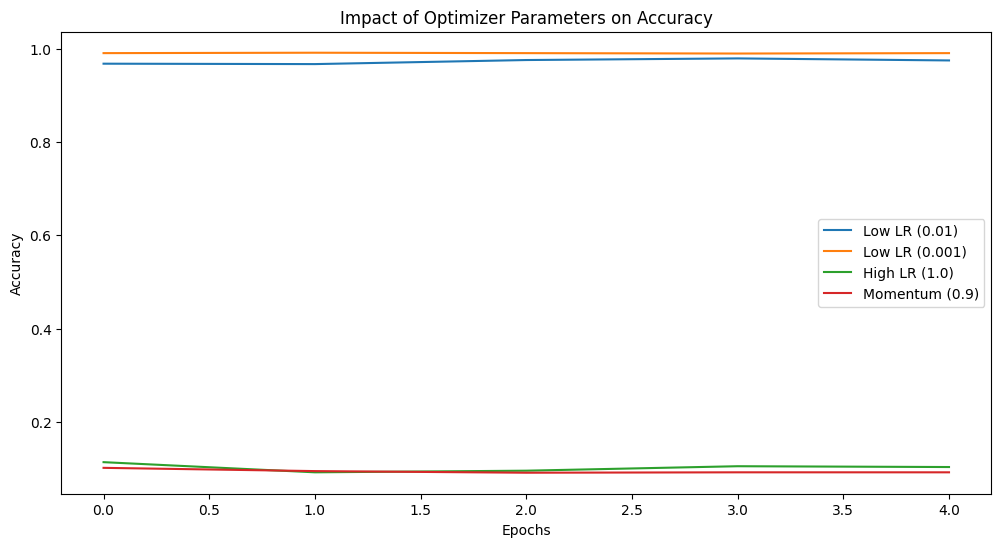

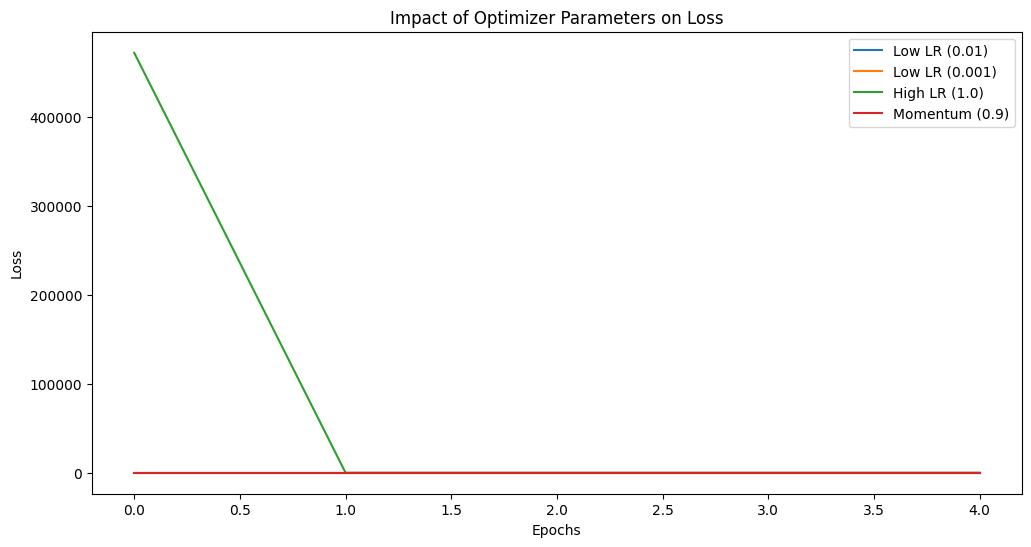

In [26]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_sgd_low_lr.history['accuracy'], label='Low LR (0.01)')
plt.plot(history_sgd_low_lr_100.history['accuracy'], label='Low LR (0.001)')
plt.plot(history_sgd_high_lr.history['accuracy'], label='High LR (1.0)')
plt.plot(history_sgd_momentum.history['accuracy'], label='Momentum (0.9)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Impact of Optimizer Parameters on Accuracy')
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history_sgd_low_lr.history['loss'], label='Low LR (0.01)')
plt.plot(history_sgd_low_lr_100.history['loss'], label='Low LR (0.001)')
plt.plot(history_sgd_high_lr.history['loss'], label='High LR (1.0)')
plt.plot(history_sgd_momentum.history['loss'], label='Momentum (0.9)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Impact of Optimizer Parameters on Loss')
plt.show()

In [27]:
from tensorflow.keras.optimizers import Adam

# Modify the model by replacing SGD with Adam optimizer
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),  # Use the Adam optimizer with default parameters
    metrics=['accuracy']
)

# Train the model with Adam optimizer
history_adam = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
36/36 [==============================] - 1s 9ms/step - loss: 2.3030 - accuracy: 0.0983 - val_loss: 2.3116 - val_accuracy: 0.0938
Epoch 2/5
36/36 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.0931 - val_loss: 2.3115 - val_accuracy: 0.0833
Epoch 3/5
36/36 [==============================] - 0s 2ms/step - loss: 2.3023 - accuracy: 0.1062 - val_loss: 2.3113 - val_accuracy: 0.0833
Epoch 4/5
36/36 [==============================] - 0s 2ms/step - loss: 2.3021 - accuracy: 0.1062 - val_loss: 2.3111 - val_accuracy: 0.0833
Epoch 5/5
36/36 [==============================] - 0s 2ms/step - loss: 2.3019 - accuracy: 0.1062 - val_loss: 2.3110 - val_accuracy: 0.0833


In [32]:
print(X_train.shape)

(1437, 64)


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Create a new model without the Flatten layer, since data is already flattened
model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),  # Directly using the flattened input shape
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes (assuming you're working with 10-class classification)
])

# Compile the model with the Adam optimizer
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Train the model with the new architecture
history_adam_with_extra_layer = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
36/36 [==============================] - 2s 10ms/step - loss: 3.3121 - accuracy: 0.3299 - val_loss: 1.1465 - val_accuracy: 0.6042
Epoch 2/5
36/36 [==============================] - 0s 3ms/step - loss: 0.7340 - accuracy: 0.7676 - val_loss: 0.5040 - val_accuracy: 0.8507
Epoch 3/5
36/36 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8930 - val_loss: 0.3868 - val_accuracy: 0.8715
Epoch 4/5
36/36 [==============================] - 0s 3ms/step - loss: 0.2363 - accuracy: 0.9373 - val_loss: 0.2718 - val_accuracy: 0.9132
Epoch 5/5
36/36 [==============================] - 0s 3ms/step - loss: 0.1709 - accuracy: 0.9617 - val_loss: 0.2562 - val_accuracy: 0.9167


In [34]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the results
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

12/12 [==============================] - 1s 3ms/step - loss: 0.2047 - accuracy: 0.9389
Loss:     0.20
Accuracy: 93.89%


In [35]:
# Get predictions for the test data
predictions = model.predict(X_test)

# Get the class with the highest probability
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Indices of misclassified samples
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Display the first few misclassified samples
for i in range(min(5, len(misclassified_indices))):
    print(f'Misclassified sample {misclassified_indices[i]}: Predicted {predicted_classes[misclassified_indices[i]]}, Actual {true_classes[misclassified_indices[i]]}')

12/12 [==============================] - 0s 818us/step
Misclassified sample 5: Predicted 2, Actual 1
Misclassified sample 18: Predicted 3, Actual 8
Misclassified sample 32: Predicted 2, Actual 1
Misclassified sample 79: Predicted 3, Actual 9
Misclassified sample 92: Predicted 6, Actual 8


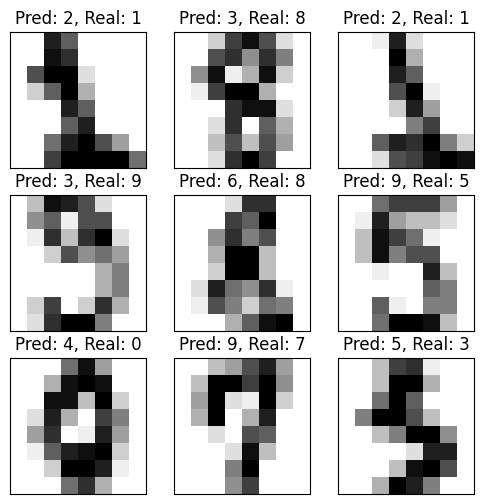

In [36]:
# Visualize a few misclassified samples
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[misclassified_indices[i]].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Pred: {predicted_classes[misclassified_indices[i]]}, Real: {true_classes[misclassified_indices[i]]}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [37]:
predictions_tf = model(X_test)
predictions_tf[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.7523544e-03, 1.0156310e-04, 3.7151563e-05, 1.7929148e-04,
        3.5659943e-04, 7.6793698e-03, 9.8512906e-01, 1.0222538e-05,
        3.6720191e-03, 1.0823669e-03],
       [3.3450809e-03, 1.2384091e-05, 3.0464613e-05, 4.5037854e-02,
        2.7818204e-04, 3.3519644e-01, 2.8424683e-06, 4.4880810e-05,
        1.9084670e-03, 6.1414337e-01],
       [8.7008711e-06, 2.3223211e-04, 1.3722292e-04, 9.9163127e-01,
        9.4006828e-06, 1.6093361e-03, 9.9324585e-05, 2.2804123e-05,
        5.5655795e-03, 6.8410253e-04],
       [5.1629078e-03, 3.9329677e-04, 1.4582732e-03, 7.4794679e-03,
        2.6778223e-03, 3.5109144e-02, 5.9115340e-05, 8.7580884e-01,
        1.7109565e-03, 7.0140302e-02],
       [5.3397543e-04, 1.2442686e-02, 5.0354004e-01, 4.7497012e-02,
        1.5088238e-04, 1.4423831e-01, 2.0087965e-02, 4.2482624e-03,
        2.6491705e-01, 2.3437070e-03]], dtype=float32)>

In [38]:
type(predictions_tf), predictions_tf.shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([360, 10]))

In [39]:
import tensorflow as tf

tf.reduce_sum(predictions_tf, axis=1)[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.99999994, 1.        , 0.99999994, 1.0000001 , 0.9999999 ],
      dtype=float32)>

In [40]:
predicted_labels_tf = tf.argmax(predictions_tf, axis=1)
predicted_labels_tf[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([6, 9, 3, 7, 2], dtype=int64)>

In [41]:
import tensorflow as tf

# Assuming predictions_tf is the tensor with raw model predictions (e.g., of shape (360, 10))

# Sum the probabilities for each sample
print(tf.reduce_sum(predictions_tf, axis=1)[:5])  # This prints the sum of probabilities for the first 5 samples

# Get the predicted labels (the class with the highest probability)
predicted_labels_tf = tf.argmax(predictions_tf, axis=1)
print(predicted_labels_tf[:5])  # This prints the predicted labels for the first 5 samples

tf.Tensor([0.99999994 1.         0.99999994 1.0000001  0.9999999 ], shape=(5,), dtype=float32)
tf.Tensor([6 9 3 7 2], shape=(5,), dtype=int64)


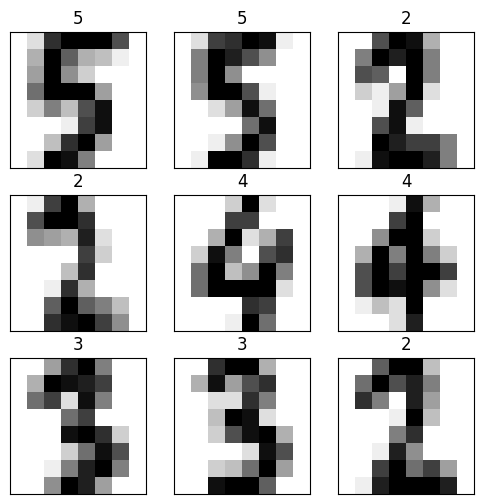

In [42]:
# Get the values corresponding to the predicted labels for each sample
predicted_values_tf = tf.reduce_max(predictions_tf, axis=1)

# Get the indices of the samples with the highest predicted values
most_confident_indices_tf = tf.argsort(predicted_values_tf, direction='DESCENDING').numpy()[:9]

# Get the 9 most confident samples
most_confident_samples_tf = X_test[most_confident_indices_tf]

# Get the true labels for the 9 most confident samples
most_confident_labels_tf = np.argmax(y_test[most_confident_indices_tf], axis=1)

# Plot the 9 most confident samples
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(most_confident_samples_tf[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"{most_confident_labels_tf[i]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

In [43]:
from tensorflow.keras import initializers
from tensorflow.keras import optimizers

input_dim = 64
hidden_dim = 64
output_dim = 10

normal_init = initializers.TruncatedNormal(stddev=0.01, seed=42)

model = Sequential()
model.add(Dense(hidden_dim, input_dim=input_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(hidden_dim, activation="tanh",
                kernel_initializer=normal_init))
model.add(Dense(output_dim, activation="softmax",
                kernel_initializer=normal_init))

model.compile(optimizer=optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.layers[0].get_weights()

[array([[ 0.00015817, -0.01590087,  0.00103594, ...,  0.00962818,
          0.00624957,  0.00994726],
        [ 0.0081879 ,  0.00756818, -0.00668142, ...,  0.01084459,
         -0.00317478, -0.00549116],
        [-0.00086618, -0.00287623,  0.00391693, ...,  0.00064558,
         -0.00420471,  0.00174566],
        ...,
        [-0.0029006 , -0.0091218 ,  0.00804327, ..., -0.01407086,
          0.00952832, -0.01348555],
        [ 0.00375078,  0.00967842,  0.00098119, ..., -0.00413454,
          0.01695471,  0.00025196],
        [ 0.00459809,  0.01223094, -0.00213172, ...,  0.01246831,
         -0.00714749, -0.00868595]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [45]:
weights_first_layer = model.layers[0].get_weights()[0]
print(weights_first_layer)

[[ 0.00015817 -0.01590087  0.00103594 ...  0.00962818  0.00624957
   0.00994726]
 [ 0.0081879   0.00756818 -0.00668142 ...  0.01084459 -0.00317478
  -0.00549116]
 [-0.00086618 -0.00287623  0.00391693 ...  0.00064558 -0.00420471
   0.00174566]
 ...
 [-0.0029006  -0.0091218   0.00804327 ... -0.01407086  0.00952832
  -0.01348555]
 [ 0.00375078  0.00967842  0.00098119 ... -0.00413454  0.01695471
   0.00025196]
 [ 0.00459809  0.01223094 -0.00213172 ...  0.01246831 -0.00714749
  -0.00868595]]


In [46]:
biases_first_layer = model.layers[0].get_weights()[1]
print(biases_first_layer)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [47]:
w = model.layers[0].weights[0].numpy()
w

array([[ 0.00015817, -0.01590087,  0.00103594, ...,  0.00962818,
         0.00624957,  0.00994726],
       [ 0.0081879 ,  0.00756818, -0.00668142, ...,  0.01084459,
        -0.00317478, -0.00549116],
       [-0.00086618, -0.00287623,  0.00391693, ...,  0.00064558,
        -0.00420471,  0.00174566],
       ...,
       [-0.0029006 , -0.0091218 ,  0.00804327, ..., -0.01407086,
         0.00952832, -0.01348555],
       [ 0.00375078,  0.00967842,  0.00098119, ..., -0.00413454,
         0.01695471,  0.00025196],
       [ 0.00459809,  0.01223094, -0.00213172, ...,  0.01246831,
        -0.00714749, -0.00868595]], dtype=float32)

In [48]:
w.std()

0.008835949

In [49]:
b = model.layers[0].weights[1].numpy()
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Epoch 1/15
45/45 [==============================] - 1s 2ms/step - loss: 2.2862 - accuracy: 0.2018
Epoch 2/15
45/45 [==============================] - 0s 1ms/step - loss: 1.7458 - accuracy: 0.4669
Epoch 3/15
45/45 [==============================] - 0s 1ms/step - loss: 0.9671 - accuracy: 0.7307
Epoch 4/15
45/45 [==============================] - 0s 1ms/step - loss: 0.5254 - accuracy: 0.8664
Epoch 5/15
45/45 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.9228
Epoch 6/15
45/45 [==============================] - 0s 1ms/step - loss: 0.2483 - accuracy: 0.9318
Epoch 7/15
45/45 [==============================] - 0s 1ms/step - loss: 0.1772 - accuracy: 0.9603
Epoch 8/15
45/45 [==============================] - 0s 1ms/step - loss: 0.1182 - accuracy: 0.9749
Epoch 9/15
45/45 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9791
Epoch 10/15
45/45 [==============================] - 0s 1ms/step - loss: 0.1299 - accuracy: 0.9582
Epoch 11/15
45/45 [

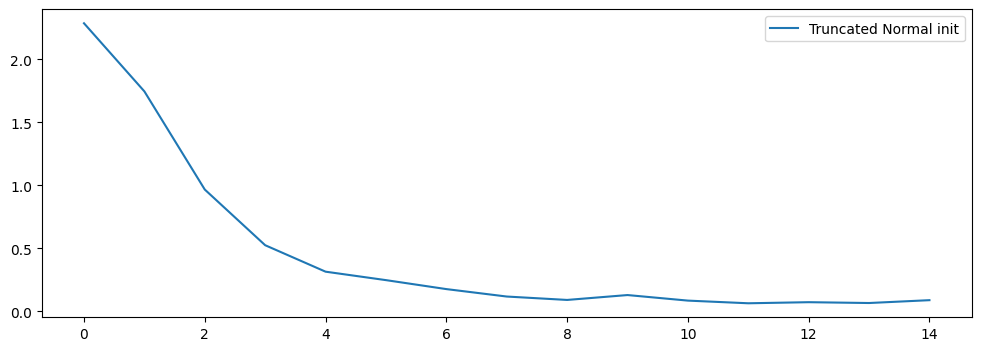

In [50]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32)

plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Truncated Normal init")
plt.legend();

In [51]:
model.layers[0].weights

[<tf.Variable 'dense_18/kernel:0' shape=(64, 64) dtype=float32, numpy=
 array([[ 1.58170762e-04, -1.59008689e-02,  1.03594456e-03, ...,
          9.62818228e-03,  6.24957308e-03,  9.94726177e-03],
        [ 1.59115419e-02, -1.34775145e-02, -5.86649170e-03, ...,
         -7.37886457e-03, -1.45362206e-02, -2.79518813e-02],
        [ 5.74397296e-02, -1.06383435e-01, -6.26463294e-02, ...,
         -3.75427157e-02, -1.23105779e-01,  7.73691460e-02],
        ...,
        [ 1.69710554e-02,  2.79109669e-03,  1.31578058e-01, ...,
         -1.17905036e-01,  6.91410601e-02, -2.08201513e-01],
        [ 1.65423732e-02, -3.55791375e-02,  1.05575696e-01, ...,
         -8.26074108e-02,  1.63562521e-02, -1.26662359e-01],
        [ 2.63380222e-02, -1.28209805e-02,  6.29089177e-02, ...,
          5.85274585e-02,  3.18868496e-02, -4.97047231e-02]], dtype=float32)>,
 <tf.Variable 'dense_18/bias:0' shape=(64,) dtype=float32, numpy=
 array([-2.44236493e-04,  2.23580911e-03,  1.93992630e-03, -8.54097772e-03,


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load the dataset
digits = load_digits()
X, y = digits.data, digits.target

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalize the data
X_train = X_train / 16.0  # The maximum value in the digits dataset is 16
X_test = X_test / 16.0

# 4. Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 5. Define the model with a new weight initializer
larger_stddev_init = initializers.TruncatedNormal(stddev=0.1, seed=42)

model_with_larger_stddev = Sequential([
    Dense(64, input_dim=64, activation="tanh", kernel_initializer=larger_stddev_init),
    Dense(64, activation="tanh", kernel_initializer=larger_stddev_init),
    Dense(10, activation="softmax", kernel_initializer=larger_stddev_init)
])

model_with_larger_stddev.compile(
    optimizer=optimizers.SGD(learning_rate=0.1),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Train the model
history_larger_stddev = model_with_larger_stddev.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

# 7. Evaluate the model
loss, accuracy = model_with_larger_stddev.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/5
36/36 [==============================] - 2s 15ms/step - loss: 2.1068 - accuracy: 0.4134 - val_loss: 1.8195 - val_accuracy: 0.6771
Epoch 2/5
36/36 [==============================] - 0s 3ms/step - loss: 1.4471 - accuracy: 0.7554 - val_loss: 1.0929 - val_accuracy: 0.8056
Epoch 3/5
36/36 [==============================] - 0s 2ms/step - loss: 0.8591 - accuracy: 0.8512 - val_loss: 0.6976 - val_accuracy: 0.8368
Epoch 4/5
36/36 [==============================] - 0s 3ms/step - loss: 0.5723 - accuracy: 0.8973 - val_loss: 0.5172 - val_accuracy: 0.8646
Epoch 5/5
12/12 [==============================] - 0s 3ms/step - loss: 0.3717 - accuracy: 0.9056
Test Loss: 0.3717, Test Accuracy: 0.9056


Q1: Try the following initialization schemes and see whether the SGD algorithm can successfully train the network or not:

stddev=1e-3 (very small):
The network struggles to train effectively. Gradients are too small, leading to slow convergence or getting stuck.

stddev=1 or 10 (larger scale):
Training becomes unstable. Loss fluctuates, and the model has difficulty converging because large initial weights cause exploding gradients.

Constant initialization (all weights = 0):
The network fails to train. This happens because all neurons in each layer learn the same features (symmetry problem), making the model ineffective.


Explanation:
Initialization directly affects how gradients propagate through the network. Poor initialization (too small, too large, or constant) disrupts the learning process, either by slowing it down or making it unstable.


---

Q2: Are more advanced solvers such as SGD with momentum or Adam able to deal better with such bad initializations?

Yes, advanced solvers like SGD with momentum or Adam handle bad initializations better than plain SGD.

SGD with momentum helps stabilize updates by using velocity, reducing fluctuations.

Adam adapts learning rates for each parameter, making it more robust to bad initializations.


However, even these solvers can struggle with extreme cases, like constant initialization, because fundamental issues like symmetry remain unsolved.